#### packages

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
import scipy
import matplotlib.pyplot as plt
import forestplot as fp

In [31]:
pd.options.display.float_format = '{:.5f}'.format

In [32]:
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

##### Data

In [33]:
df = pd.read_csv('/Users/idogeon/Desktop/포트폴리오/DIP/데이터/re_0826.csv', encoding='cp949')
df.isnull().sum()

pid              0
majorcat         0
province         0
area             0
sex              0
                ..
주당근로시간           0
주당근로시간_binary    0
직장에서의복리후생제공여부    0
보험가입여부           0
직장만족도            0
Length: 141, dtype: int64

In [34]:
df

,pid,majorcat,province,area,sex,age,a003,a004_10,a010,a014,...,출퇴근시간,사업체지역,산업체,산업체분류,주당근로일,주당근로시간,주당근로시간_binary,직장에서의복리후생제공여부,보험가입여부,직장만족도
0,100166,1,2,경기,2,22.50000,NaN,NaN,NaN,NaN,...,NaN,서울,숙박/음식점업,3차산업,5.00000,6,40시간이하,제공한다,가입했다,그렇다
1,100191,1,4,울산,2,26.91667,NaN,NaN,NaN,NaN,...,NaN,울산,교육서비스업,3차산업,5.00000,40,40시간이하,제공하지않는다,가입하지않음,보통이다
2,100212,1,2,경기,2,24.66667,NaN,NaN,NaN,NaN,...,NaN,경기,사업시설관리/사업지원및임대서비스업,3차산업,6.00000,40,40시간이하,제공하지않는다,가입하지않음,보통이다
3,100221,1,2,경기,2,25.25000,NaN,NaN,NaN,NaN,...,NaN,인천,숙박/음식점업,3차산업,5.00000,25,40시간이하,제공하지않는다,가입하지않음,보통이다
4,100278,1,2,경기,2,22.66667,NaN,NaN,NaN,NaN,...,NaN,서울,정보통신업,3차산업,5.00000,40,40시간이하,제공하지않는다,가입했다,그렇다
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,117390,7,2,경기,2,26.16667,NaN,NaN,NaN,NaN,...,NaN,서울,정보통신업,3차산업,5.00000,30,40시간이하,제공하지않는다,가입하지않음,보통이다
5013,117412,7,3,충남,2,23.75000,NaN,NaN,NaN,NaN,...,NaN,서울,예술/스포츠/여가관련서비스업,3차산업,6.00000,36,40시간이하,제공하지않는다,가입하지않음,그렇다
5014,117489,7,5,광주,1,26.75000,NaN,NaN,NaN,NaN,...,NaN,광주,교육서비스업,3차산업,3.00000,3,40시간이하,제공하지않는다,가입하지않음,그렇다
5015,117587,7,4,경북,2,24.50000,1.00000,9.00000,1.00000,3.00000,...,5.00000,대구,숙박/음식점업,3차산업,4.00000,26,40시간이하,제공하지않는다,가입했다,그렇다


In [35]:
df_copy = df.copy()
daegu = df_copy[df_copy['사업체지역']=='대구'].copy()

In [36]:
model = sm.Logit.from_formula('''LongWork2 ~ age + C(성별,Treatment("여자")) + C(건강상태,Treatment('건강하지않다'))''', daegu).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.422239
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      279
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                 0.05890
Time:                        22:41:45   Log-Likelihood:                -119.92
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                  0.004677
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -8.5828      1.943     -4.416      0.000     -12.392      -4.774
C(성별, Treatment("여자"))[T.남자]            -0.0665      0.368     -0.181      0.857      -0.788       0.655
C(건강상태, Treatment('건강하지않다'))[T.건강하다]    -0.0234      0.539     -0.043      0.965      -1.081       1.034
C(건강상태, Treatment('건강하지않다'))[T.보통이다]     0.1322      0.577      0.229      0.819      -0.998       1.262
age                                      0.2629      0.075      3.492      0.000       0.115       0.410
========================================================================================================
"""

In [37]:
print(f'모델 AIC:{model.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:249.8314872239519




,OR,Lower CI,Upper CI
Intercept,0.00019,0.00000,0.00845
"C(성별, Treatment(""여자""))[T.남자]",0.93569,0.45485,1.92486
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",0.97690,0.33937,2.81210
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",1.14133,0.36859,3.53407
age,1.30073,1.12227,1.50757


In [38]:
model_2 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment("여자")) 
                                + C(건강상태,Treatment("건강하지않다")) 
    + C(전공일치,Treatment("맞지않다")) + 학점 + C(재학중일자리경험,Treatment('없다'))''', daegu).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.380231
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                  265
Model:                          Logit   Df Residuals:                      256
Method:                           MLE   Df Model:                            8
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.1302
Time:                        22:41:45   Log-Likelihood:                -100.76
converged:                       True   LL-Null:                       -115.85
Covariance Type:            nonrobust   LLR p-value:                 0.0001971
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -8.3033      2.306     -3.601      0.000     -12.823      -3.784
C(성별, Treatment("여자"))[T.남자]            -0.0906      0.405     -0.224      0.823      -0.884       0.703
C(건강상태, Treatment("건강하지않다"))[T.건강하다]     0.0729      0.606      0.120      0.904      -1.115       1.261
C(건강상태, Treatment("건강하지않다"))[T.보통이다]     0.4452      0.641      0.694      0.488      -0.812       1.702
C(전공일치, Treatment("맞지않다"))[T.보통이다]       0.5024      0.470      1.070      0.285      -0.418       1.423
C(전공일치, Treatment("맞지않다"))[T.잘맞다]        0.6738      0.435      1.549      0.121      -0.179       1.526
C(재학중일자리경험, Treatment('없다'))[T.있다]      -1.1001      0.387     -2.845      0.004      -1.858      -0.342
나이                                       0.2924      0.085      3.443      0.001       0.126       0.459
학점                                      -0.4145      0.347     -1.194      0.232      -1.095       0.266
========================================================================================================
"""

In [39]:
print(f'모델 AIC:{model_2.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model_2.params,
        "Lower CI": model_2.conf_int()[0],
        "Upper CI": model_2.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:219.5225062433798




,OR,Lower CI,Upper CI
Intercept,0.00025,0.00000,0.02274
"C(성별, Treatment(""여자""))[T.남자]",0.91335,0.41310,2.01940
"C(건강상태, Treatment(""건강하지않다""))[T.건강하다]",1.07567,0.32795,3.52819
"C(건강상태, Treatment(""건강하지않다""))[T.보통이다]",1.56080,0.44393,5.48751
"C(전공일치, Treatment(""맞지않다""))[T.보통이다]",1.65270,0.65847,4.14815
"C(전공일치, Treatment(""맞지않다""))[T.잘맞다]",1.96166,0.83645,4.60052
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.33284,0.15597,0.71026
나이,1.33968,1.13422,1.58235
학점,0.66064,0.33460,1.30436


In [40]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment('여자')) + C(건강상태,Treatment('건강하지않다')) 
    + C(전공일치,Treatment('맞지않다'))
    + 학점 + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
    + C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) +
    C(업무만족도,Treatment('그렇지않다')) ''', daegu).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.329636
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                  265
Model:                          Logit   Df Residuals:                      248
Method:                           MLE   Df Model:                           16
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.2460
Time:                        22:41:45   Log-Likelihood:                -87.353
converged:                       True   LL-Null:                       -115.85
Covariance Type:            nonrobust   LLR p-value:                 1.670e-06
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -7.4803      2.590     -2.889      0.004     -12.556      -2.405
C(성별, Treatment('여자'))[T.남자]                  0.0425      0.445      0.095      0.924      -0.829       0.914
C(건강상태, Treatment('건강하지않다'))[T.건강하다]          0.0324      0.758      0.043      0.966      -1.454       1.519
C(건강상태, Treatment('건강하지않다'))[T.보통이다]          0.6215      0.750      0.829      0.407      -0.849       2.092
C(전공일치, Treatment('맞지않다'))[T.보통이다]            0.5776      0.517      1.118      0.264      -0.435       1.590
C(전공일치, Treatment('맞지않다'))[T.잘맞다]             0.4693      0.489      0.960      0.337      -0.489       1.427
C(재학중일자리경험, Treatment('없다'))[T.있다]           -1.1216      0.423     -2.651      0.008      -1.951      -0.292
C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]       -0.2267      0.895     -0.253      0.800      -1.980       1.527
C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]      -2.0400      0.961     -2.123      0.034      -3.924      -0.156
C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]        1.1098      1.252      0.886      0.376      -1.345       3.565
C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]       3.5460      1.097      3.234      0.001       1.397       5.695
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]     -1.7833      1.282     -1.392      0.164      -4.295       0.728
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]    -2.1935      1.081     -2.030      0.042      -4.311      -0.076
C(업무만족도, Treatment('그렇지않다'))[T.그렇다]          -1.5367      0.792     -1.939      0.052      -3.090       0.016
C(업무만족도, Treatment('그렇지않다'))[T.보통이다]         -0.6930      0.451     -1.536      0.125      -1.577       0.191
나이                                            0.2916      0.094      3.117      0.002       0.108       0.475
학점                                           -0.5369      0.369     -1.454      0.146      -1.261       0.187
=============================================================================================================
"""

In [41]:
print(f'모델 AIC:{model_3.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:208.7069973156184




,OR,Lower CI,Upper CI
Intercept,0.00056,0.00000,0.09030
"C(성별, Treatment('여자'))[T.남자]",1.04338,0.43642,2.49448
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",1.03296,0.23359,4.56785
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",1.86178,0.42802,8.09819
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",1.78182,0.64720,4.90554
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",1.59888,0.61339,4.16764
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.32575,0.14215,0.74646
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.79716,0.13804,4.60366
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]",0.13003,0.01977,0.85520
"C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]",3.03385,0.26058,35.32255


In [42]:
odds_ratios.index = ['절편', '성별 Ref:여자|남자',
       '건강상태 Ref:건강하지않다|건강하다',
       '건강상태 Ref:건강하지않다|보통이다',
       '대학지역,Ref:비수도권|수도권',
       '전공일치 Ref:맞지않다|보통이다',
       '전공일치 Ref:맞지않다|잘맞다',
       '재학중일자리경험 Ref:없다|있다',
       '삶의만족도_개인 REF:그렇지않다|그렇다',
       '삶의만족도_개인 REF:그렇지않다|보통이다',
       '삶의만족도_관계 REF:그렇지않다|그렇다',
       '삶의만족도_관계 REF:그렇지않다|보통이다',
       '삶의만족도_소속집단 REF:그렇지않다|그렇다',
       '삶의만족도_소속집단 REF:그렇지않다|보통이다',
       '업무만족도 REF:그렇지않다|그렇다',
       '업무만족도 REF:그렇지않다|보통이다', '나이', '학점']

In [43]:
odds_ratios['label'] = odds_ratios.index
odds_ratios.shape

(17, 4)

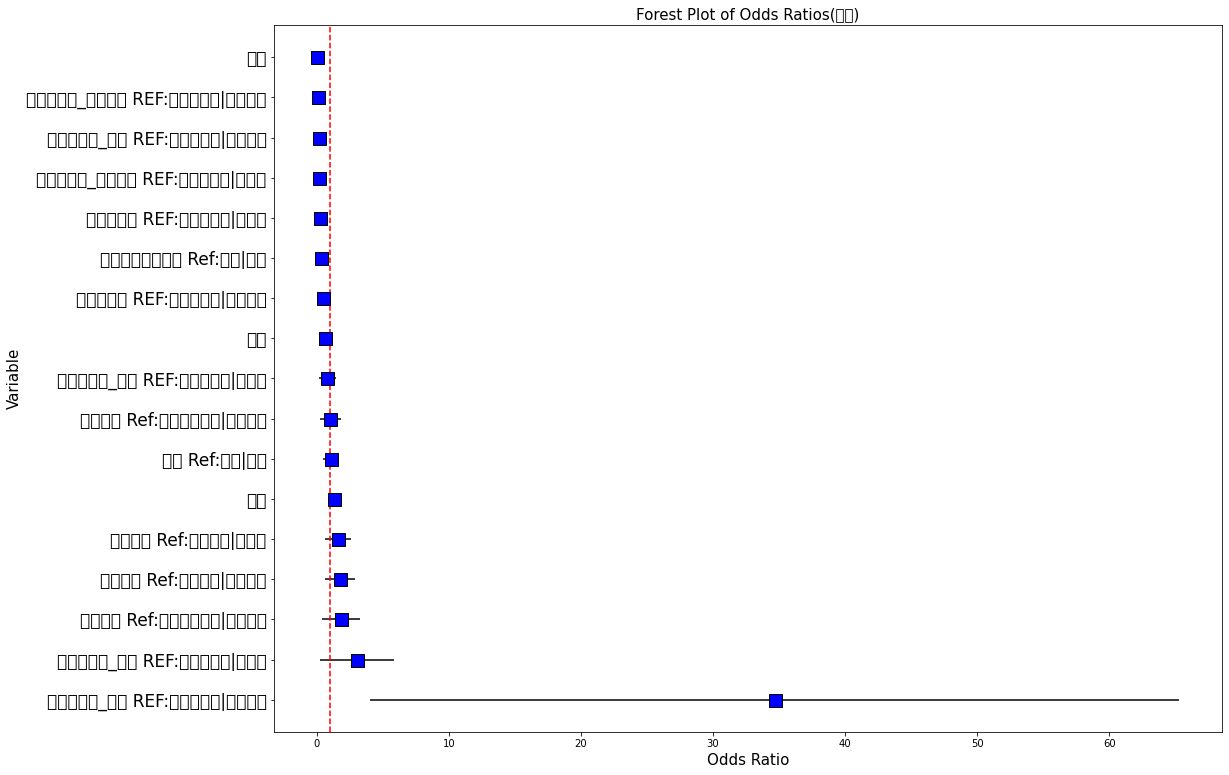

In [44]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios.loc[var, "OR"], odds_ratios.loc[var, "Lower CI"], odds_ratios.loc[var, "Upper CI"]) for var in odds_ratios.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='black', 
             markersize=13, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios(전체)', fontsize=15)

# Show the plot
plt.show()

#### Using Forest plot packages

![Example Image](https://raw.githubusercontent.com/LSYS/forestplot/main/docs/images/main.png)

##### 단변량------------------------------------------------------

In [45]:
ag = sm.Logit.from_formula('''LongWork2 ~ age''', daegu).fit()
print(ag.summary())
# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": ag.params,
        "Lower CI": ag.conf_int()[0],
        "Upper CI": ag.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.422652
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                 0.05798
Time:                        22:44:51   Log-Likelihood:                -120.03
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                 0.0001210
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.4591      1.831     -4.620      0.000     -12.048      -4.870
age            0.2579      0.

,OR,Lower CI,Upper CI
Intercept,0.00021,0.00001,0.00767
age,1.29421,1.13318,1.47812


In [46]:
se = sm.Logit.from_formula('''LongWork2 ~ C(성별,Treatment("여자"))''', daegu).fit()
print(se.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": se.params,
        "Lower CI": se.conf_int()[0],
        "Upper CI": se.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.445033
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                0.008099
Time:                        22:44:52   Log-Likelihood:                -126.39
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                    0.1508
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.8563      0.240     -7.720      0.000

,OR,Lower CI,Upper CI
Intercept,0.15625,0.09753,0.25031
"C(성별, Treatment(""여자""))[T.남자]",1.58532,0.84252,2.98300


In [47]:
model = sm.Logit.from_formula('''LongWork2 ~ C(건강상태,Treatment('건강하지않다'))''', daegu).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.447680
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      281
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                0.002200
Time:                        22:44:52   Log-Likelihood:                -127.14
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                    0.7555
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.8871      0.4

,OR,Lower CI,Upper CI
Intercept,0.15152,0.05915,0.38810
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",1.29130,0.46237,3.60634
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",1.50000,0.50181,4.48372


In [48]:
model = sm.Logit.from_formula('''LongWork2 ~ C(전공일치,Treatment('맞지않다'))''', daegu).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.438958
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      281
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                 0.02164
Time:                        22:44:52   Log-Likelihood:                -124.66
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                   0.06345
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.9871      0.259    

,OR,Lower CI,Upper CI
Intercept,0.13710,0.08258,0.22760
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",1.43022,0.61349,3.33423
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",2.35294,1.15124,4.80903


In [49]:
model = sm.Logit.from_formula('''LongWork2 ~ 학점''', daegu).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.434842
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  265
Model:                          Logit   Df Residuals:                      263
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                0.005298
Time:                        22:44:53   Log-Likelihood:                -115.23
converged:                       True   LL-Null:                       -115.85
Covariance Type:            nonrobust   LLR p-value:                    0.2679
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6955      0.859     -0.809      0.418      -2.380       0.989
학점            -0.3552      0.

,OR,Lower CI,Upper CI
Intercept,0.49881,0.09258,2.68753
학점,0.70102,0.38131,1.28880


In [50]:
model = sm.Logit.from_formula('''LongWork2 ~ C(재학중일자리경험,Treatment('없다'))''', daegu).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.431648
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                 0.03793
Time:                        22:44:53   Log-Likelihood:                -122.59
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                  0.001876
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.1690      0.202    

,OR,Lower CI,Upper CI
Intercept,0.31068,0.20895,0.46194
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.36031,0.18531,0.70055


In [51]:
model = sm.Logit.from_formula('''LongWork2 ~ C(삶의만족도_개인,Treatment('그렇지않다'))''', daegu).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.439979
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      281
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                 0.01937
Time:                        22:44:53   Log-Likelihood:                -124.95
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                   0.08479
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -1.4064

,OR,Lower CI,Upper CI
Intercept,0.24503,0.17103,0.35105
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.65824,0.23958,1.80849
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]",0.37101,0.13875,0.99206


In [52]:
model = sm.Logit.from_formula('''LongWork2 ~ C(삶의만족도_관계,Treatment('그렇지않다'))''', daegu).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.443040
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      281
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                 0.01254
Time:                        22:44:53   Log-Likelihood:                -125.82
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                    0.2023
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -1.6964

,OR,Lower CI,Upper CI
Intercept,0.18333,0.12649,0.26572
"C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]",0.65455,0.18683,2.29318
"C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]",1.87500,0.86027,4.08664


In [53]:
model = sm.Logit.from_formula('''LongWork2 ~ C(삶의만족도_소속집단,Treatment('그렇지않다'))''', daegu).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.440892
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      281
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                 0.01733
Time:                        22:44:53   Log-Likelihood:                -125.21
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                    0.1099
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -

,OR,Lower CI,Upper CI
Intercept,0.24359,0.17087,0.34725
"C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]",0.47368,0.13618,1.64767
"C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]",0.44785,0.17951,1.11730


In [54]:
model = sm.Logit.from_formula('''LongWork2 ~ C(업무만족도,Treatment('그렇지않다'))''', daegu).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.430166
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      281
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                 0.04123
Time:                        22:44:53   Log-Likelihood:                -122.17
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                  0.005225
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.1407      0.2

,OR,Lower CI,Upper CI
Intercept,0.31959,0.21329,0.47886
"C(업무만족도, Treatment('그렇지않다'))[T.그렇다]",0.24703,0.07127,0.85622
"C(업무만족도, Treatment('그렇지않다'))[T.보통이다]",0.39880,0.19710,0.80691
